Problem staement :Create a Python script or workflow that automates the analysis of customer data (e.g., purchase history, browsing behavior) to identify trends and segment customers for targeted marketing campaigns. What data processing and visualization tools would you use? 

Here are the steps to implement the customer segmentation analysis:

Step 1: Data Ingestion

Collect the customer data from a database or CSV file.
Use pandas to read the data into a DataFrame.

Step 2: Data Cleaning

a. Handle missing values by imputing them with the mean or median value.
b. Encode categorical variables using pandas' Categorical function.
c. Scale/normalize numerical variables using scikit-learn's StandardScaler.

Step 3: Exploratory Data Analysis (EDA)

Use matplotlib and seaborn to produce visuals to gain insights on distributions of customer data.

Step 4: Clustering

Use scikit-learn's KMeans to perform clustering analysis.

Step 5: Segmentation

Use pandas to group the data by cluster and analyze the segments.


Step 6: Visualization

Use Plotly to create an interactive visualization of the customer segments.



This script uses the following tools:

Pandas: for data ingestion, cleaning, and manipulation.
Matplotlib and Seaborn: for exploratory data analysis (EDA) and visualization.
Scikit-learn: for clustering analysis (k-means) and evaluation (silhouette score).
Plotly: for interactive visualization of customer segments.

In [69]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.preprocessing import LabelEncoder, StandardScaler

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')

In [127]:
df = pd.read_csv('Booksheet.csv')


In [129]:
df.head()

,Customer ID,Category,Purchase History,Browsing Behavior
0,1,Electronics,500,High
1,2,Fashion,200,Medium
2,3,Electronics,800,High
3,4,Fashion,400,Low
4,5,Electronics,300,Medium


Data processing and outliners

In [19]:
df = pd.get_dummies(df, columns=['Category'])
df['Purchase History'] = pd.to_numeric(df['Purchase History'])

In [21]:
df.info

<bound method DataFrame.info of     Customer ID  Purchase History Browsing Behavior  Category_Electronics  \
0             1               500              High                  True   
1             2               200            Medium                 False   
2             3               800              High                  True   
3             4               400               Low                 False   
4             5               300            Medium                  True   
..          ...               ...               ...                   ...   
95           96               700            Medium                 False   
96           97               400            Medium                  True   
97           98               200               Low                 False   
98           99               600              High                  True   
99          100               500            Medium                 False   

    Category_Fashion  
0              False

Step 2: Data Cleaning

Handle missing values by imputing them with the mean or median value.


In [154]:
import pandas as pd


df = pd.read_csv('Booksheet.csv')


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean(axis=0))


Encode categorical variables using pandas' Categorical function.

In [164]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler


categorical_cols = df.select_dtypes(include=['object']).columns

le = LabelEncoder()
df[categorical_cols] = df[categorical_cols].apply(le.fit_transform)


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns


df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


Scale/normalize numerical variables using scikit-learn's StandardScaler.

In [172]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Purchase History', 'Browsing Behavior']] = scaler.fit_transform(df[['Purchase History', 'Browsing Behavior']])

In [174]:
df.info

<bound method DataFrame.info of     Customer ID  Category  Purchase History  Browsing Behavior
0     -1.714816         0         -0.176432          -1.212626
1     -1.680173         1         -1.499676           0.972286
2     -1.645531         0          1.146811          -1.212626
3     -1.610888         1         -0.617514          -0.120170
4     -1.576245         0         -1.058595           0.972286
..          ...       ...               ...                ...
95     1.576245         1          0.705730           0.972286
96     1.610888         0         -0.617514           0.972286
97     1.645531         1         -1.499676          -0.120170
98     1.680173         0          0.264649          -1.212626
99     1.714816         1         -0.176432           0.972286

[100 rows x 4 columns]>

Step 3: Exploratory Data Analysis (EDA)

Use matplotlib and seaborn to produce visuals to gain insights on distributions of customer data.

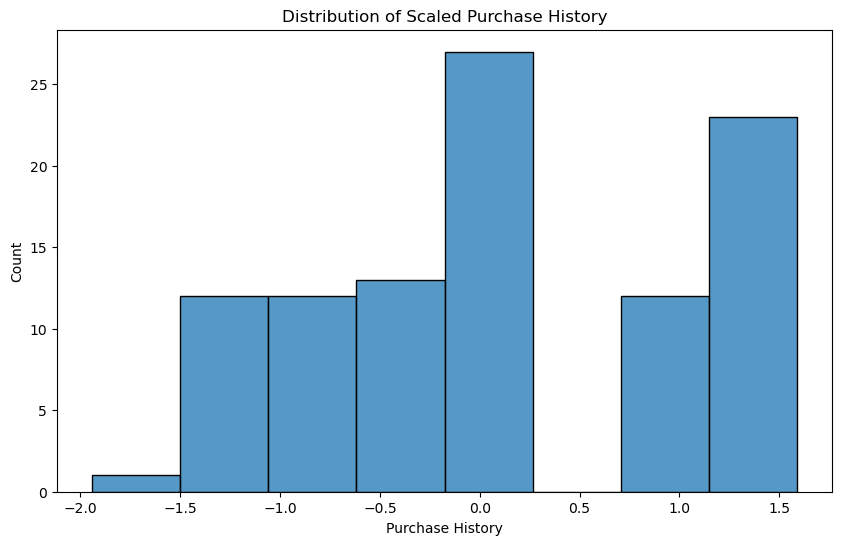

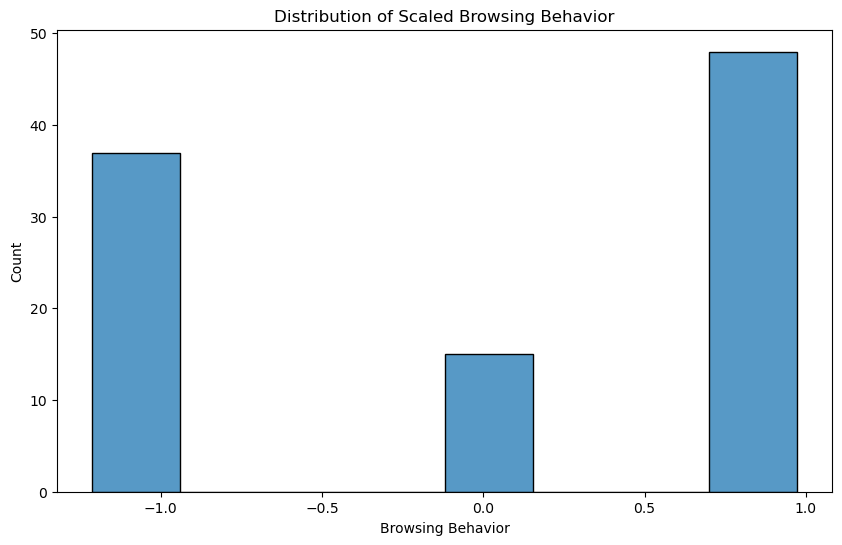

In [182]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Purchase History'], kde=False)
plt.title('Distribution of Scaled Purchase History')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['Browsing Behavior'], kde=False)
plt.title('Distribution of Scaled Browsing Behavior')
plt.show()

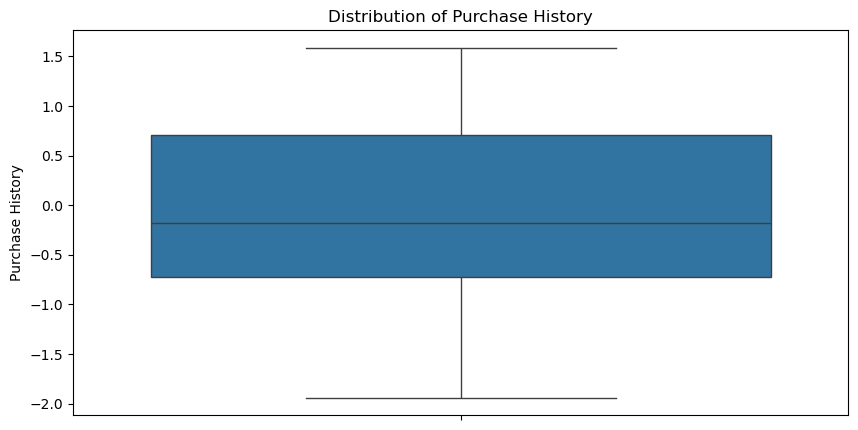

In [176]:

# EDA
plt.figure(figsize=(10, 5))
sns.boxplot(df['Purchase History'])
plt.title('Distribution of Purchase History')
plt.show()


<Axes: xlabel='Purchase History', ylabel='Browsing Behavior'>

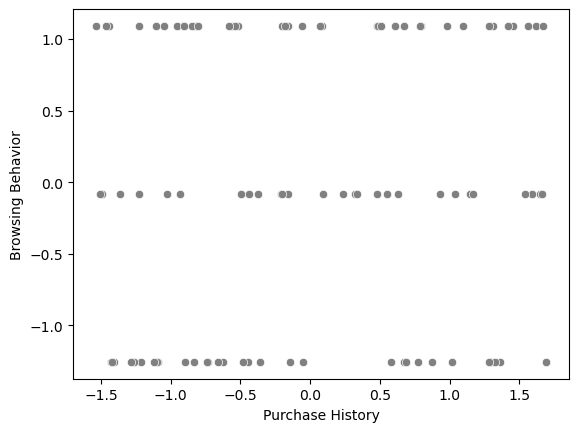

In [97]:
sns.scatterplot(x = df['Purchase History'], y = df['Browsing Behavior'],color = 'grey')

In [71]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
# Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(df[['Purchase History', 'Browsing Behavior']])
labels = kmeans.labels_


In [74]:
segments = pd.DataFrame({'segment': labels, 'Purchase History': df['Purchase History'], 'Browsing Behavior': df['Browsing Behavior']})

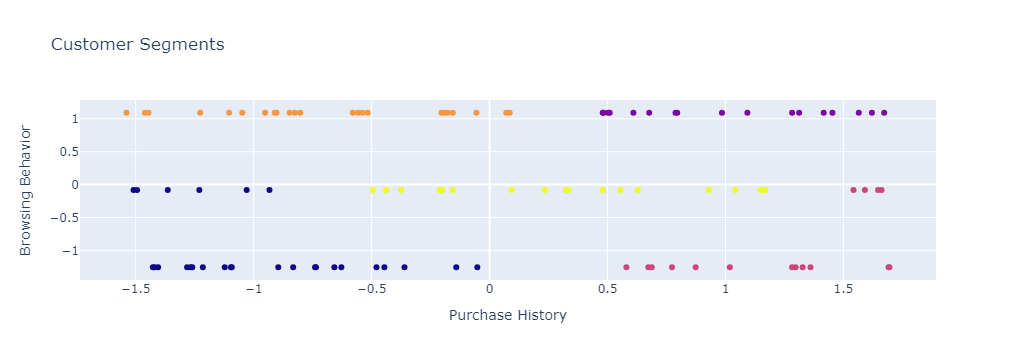

In [92]:
# Visualization
fig = go.Figure(data=[go.Scatter(x=segments['Purchase History'], y=segments['Browsing Behavior'], mode='markers', marker=dict(color=segments['segment']))])
fig.update_layout(title='Customer Segments', xaxis_title='Purchase History', yaxis_title='Browsing Behavior')
fig.show()

In [ ]:
plot purchase vs broesing VS category

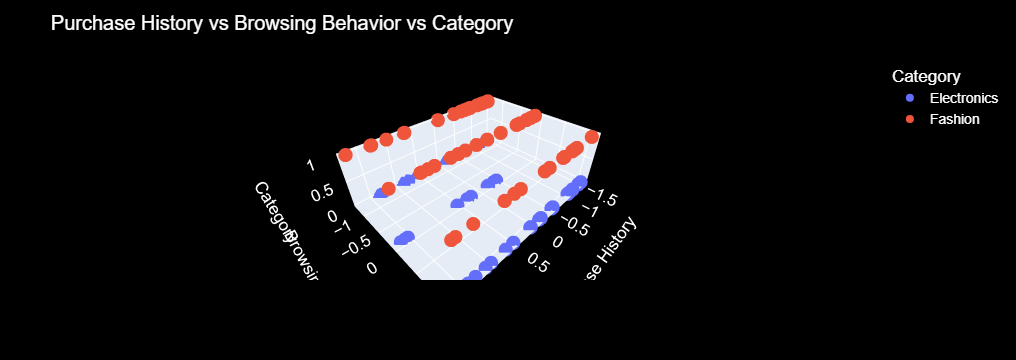

In [88]:
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

# Generate 100 random data points
np.random.seed(0)
data = {
    "Customer ID": np.arange(1, 101),
    "Category": np.random.choice(["Electronics", "Fashion"], size=100),
    "Purchase History": np.random.randint(100, 1000, size=100),
    "Browsing Behavior": np.random.choice(["High", "Medium", "Low"], size=100)
}

df = pd.DataFrame(data)

# Encode the categorical values in the 'Browsing Behavior' column
le = LabelEncoder()
df['Browsing Behavior'] = le.fit_transform(df['Browsing Behavior'])

# Apply StandardScaler to the 'Purchase History' and 'Browsing Behavior' columns
scaler = StandardScaler()
df[['Purchase History', 'Browsing Behavior']] = scaler.fit_transform(df[['Purchase History', 'Browsing Behavior']])

# Create a numerical representation of 'Category'
df['Category_Numeric'] = df['Category'].map({'Electronics': 0, 'Fashion': 1})

# Plot the scaled data
fig = px.scatter_3d(df, x="Purchase History", y="Browsing Behavior", z="Category_Numeric", color="Category")
fig.update_layout(
    title="Purchase History vs Browsing Behavior vs Category",
    scene = dict(
        xaxis_title="Purchase History",
        yaxis_title="Browsing Behavior",
        zaxis_title="Category"),
    font=dict(
        family="Arial",
        size=14,
        color="#ffffff"
    ),
    plot_bgcolor="#f0f0f0", 
    paper_bgcolor="#000000",
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    xaxis_gridcolor="#fff000", 
    yaxis_gridcolor="#000fff"
)

# Show the graph
fig.show()

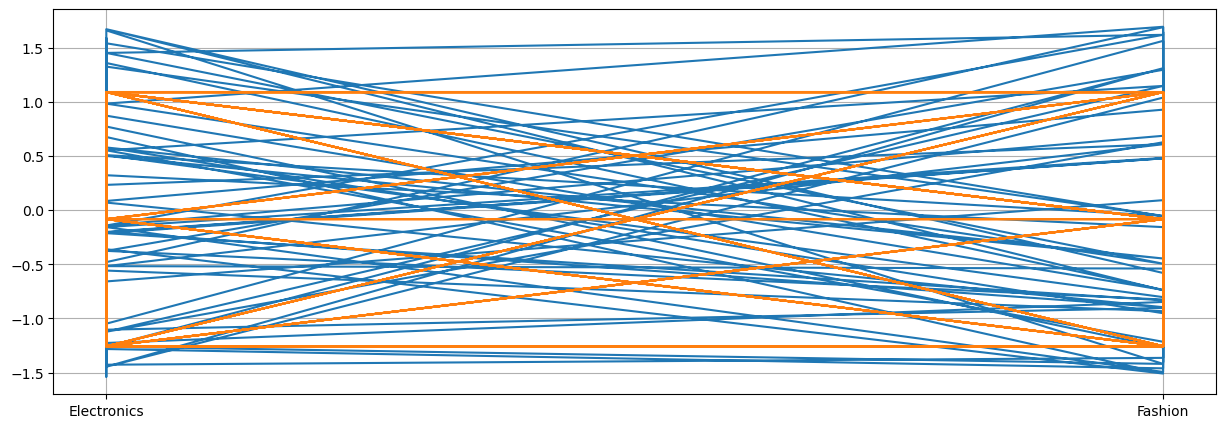

In [105]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['Category'], df[['Purchase History', 'Browsing Behavior']])
plt.grid();

CORRELATION

In [111]:
df = pd.get_dummies(df, columns=['Category'])

<Axes: >

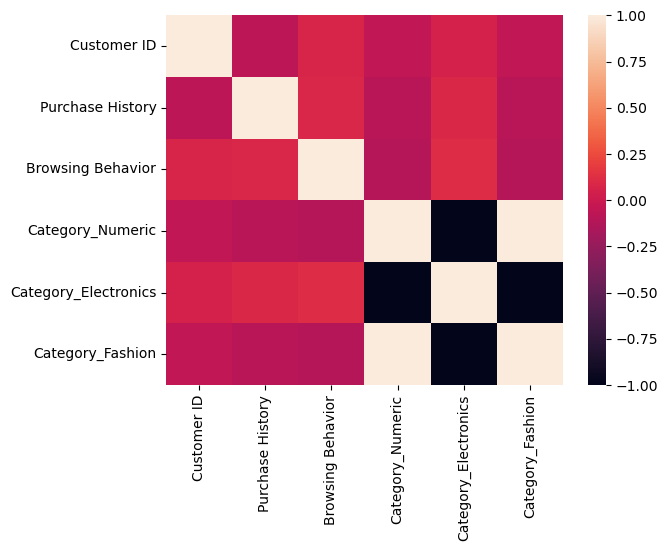

In [113]:
corr = df.corr()
sns.heatmap(data=corr)

Step 4: Clustering

Use scikit-learn's KMeans to perform clustering analysis.

In [184]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=5)
df['cluster'] = kmeans.fit_predict(df[['Purchase History', 'Browsing Behavior']])

Evaluate the clustering using the silhouette score

In [187]:
silhouette = silhouette_score(df[['Purchase History', 'Browsing Behavior']], df['cluster'])
print(f'Silhouette Score: {silhouette:.3f}')

Silhouette Score: 0.737


Step 5: Segmentation

Use pandas to group the data by cluster and analyze the segments.

In [191]:
segments = df.groupby('cluster')
for name, group in segments:
    print(f'Segment {name}:')
    print(group.describe())

Segment 0:
       Customer ID   Category  Purchase History  Browsing Behavior  cluster
count    13.000000  13.000000         13.000000       1.300000e+01     13.0
mean     -0.174546   0.153846         -1.126453       9.722857e-01      0.0
std       1.053582   0.375534          0.165641       1.155557e-16      0.0
min      -1.680173   0.000000         -1.499676       9.722857e-01      0.0
25%      -1.021961   0.000000         -1.058595       9.722857e-01      0.0
50%      -0.190535   0.000000         -1.058595       9.722857e-01      0.0
75%       0.640891   0.000000         -1.058595       9.722857e-01      0.0
max       1.472317   1.000000         -1.058595       9.722857e-01      0.0
Segment 1:
       Customer ID   Category  Purchase History  Browsing Behavior  cluster
count    37.000000  37.000000         37.000000          37.000000     37.0
mean     -0.007022   0.324324          0.932231          -1.212626      1.0
std       1.017003   0.474579          0.584621           0.000000

Step 6: Visualization

Use Plotly to create an interactive visualization of the customer segments.
Used above also.



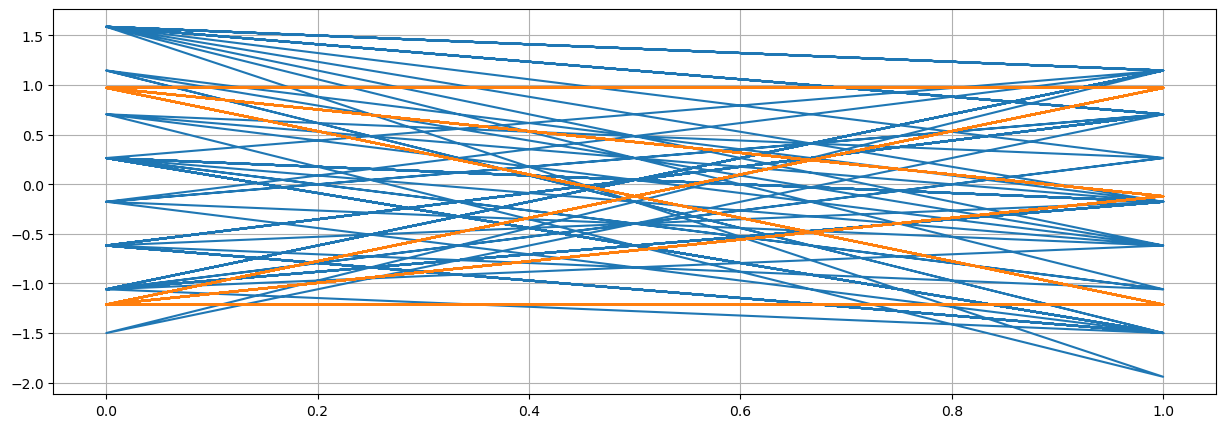

In [194]:
plt.figure(figsize = (15, 5))
fig = plt.plot(df['Category'], df[['Purchase History', 'Browsing Behavior']])
plt.grid();

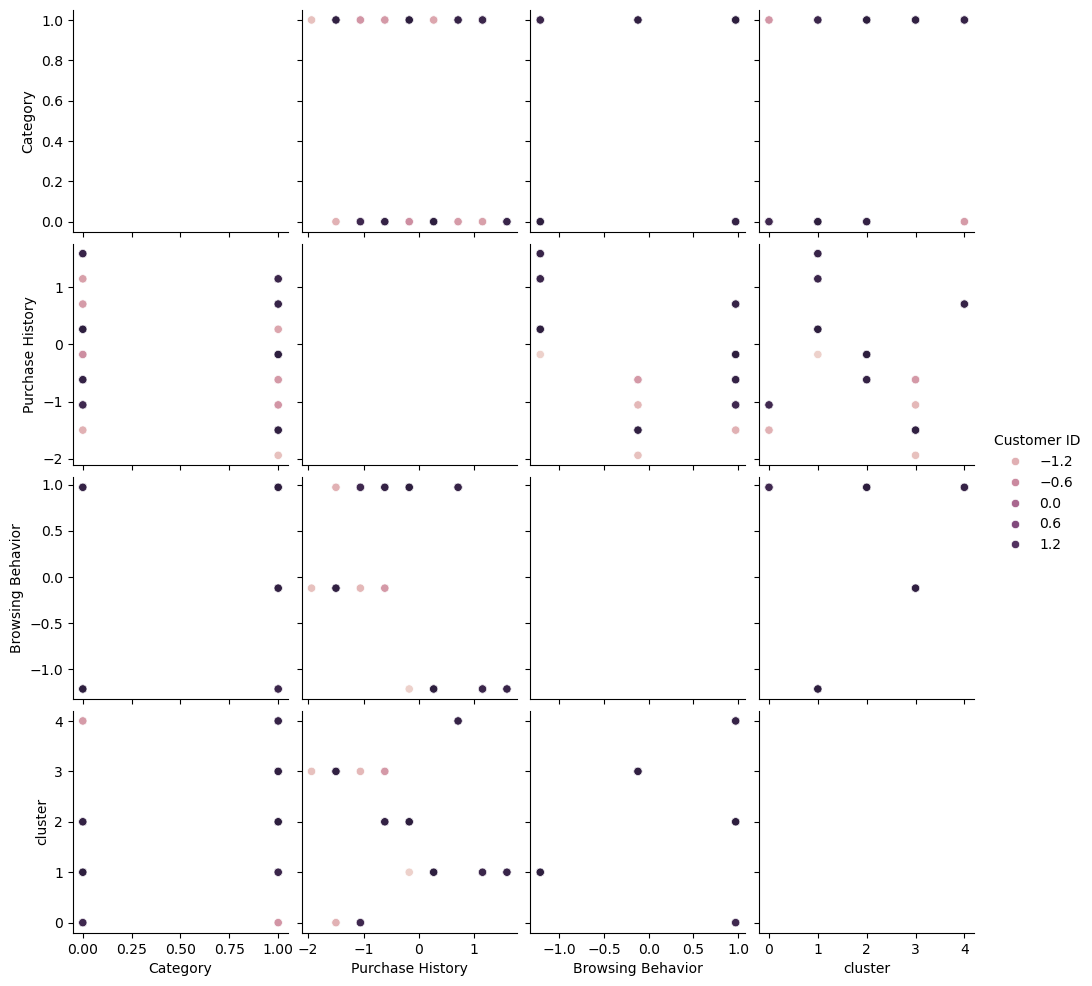

In [199]:

sns.pairplot(df, vars=['Category', 'Purchase History', 'Browsing Behavior','cluster'], hue='Customer ID')
plt.show()

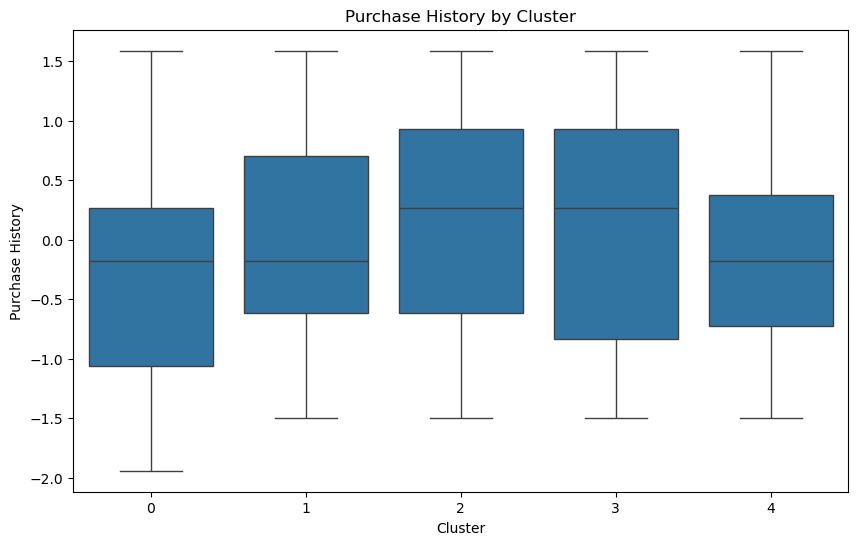

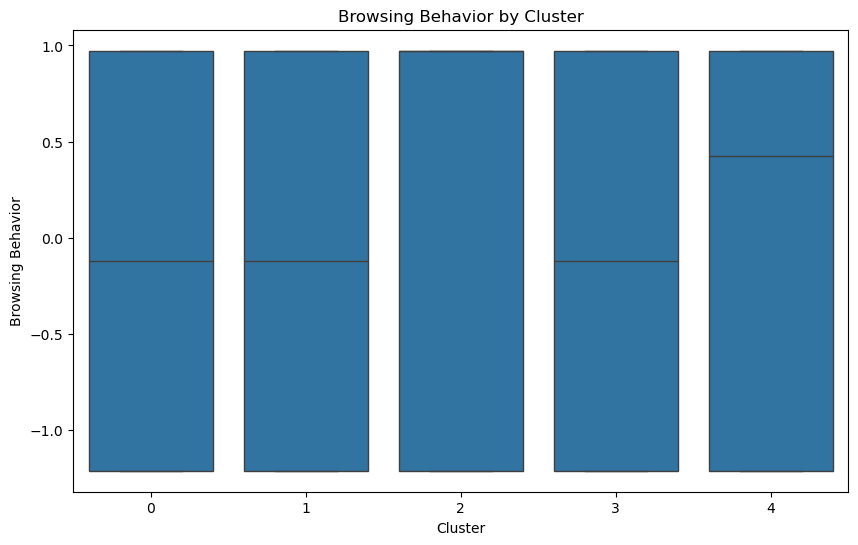

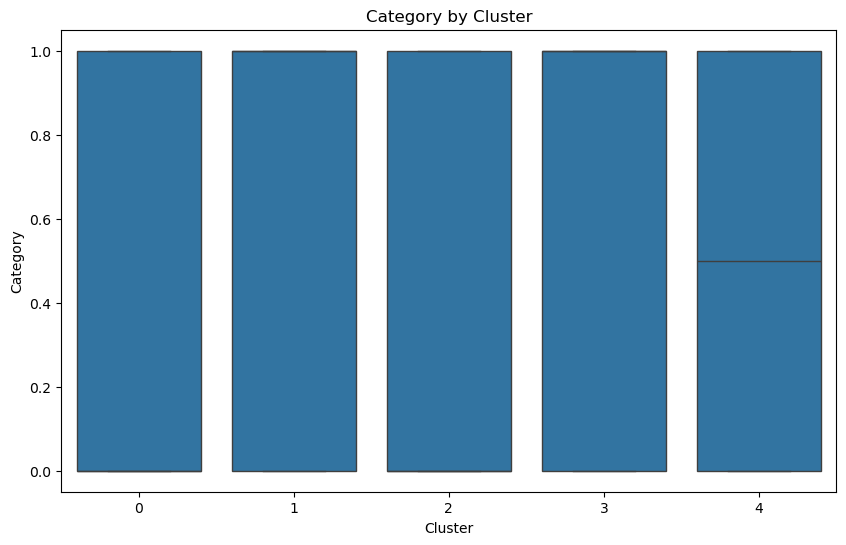

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming your data is in a Pandas DataFrame called `df`

# Create a new column for the cluster labels
df['Cluster'] = [0]*13 + [1]*37 + [2]*23 + [3]*15 + [4]*12

# Create a rectangular plot
plt.figure(figsize=(10,6))
sns.boxplot(x="Cluster", y="Purchase History", data=df)
plt.title("Purchase History by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Purchase History")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="Cluster", y="Browsing Behavior", data=df)
plt.title("Browsing Behavior by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Browsing Behavior")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x="Cluster", y="Category", data=df)
plt.title("Category by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Category")
plt.show()

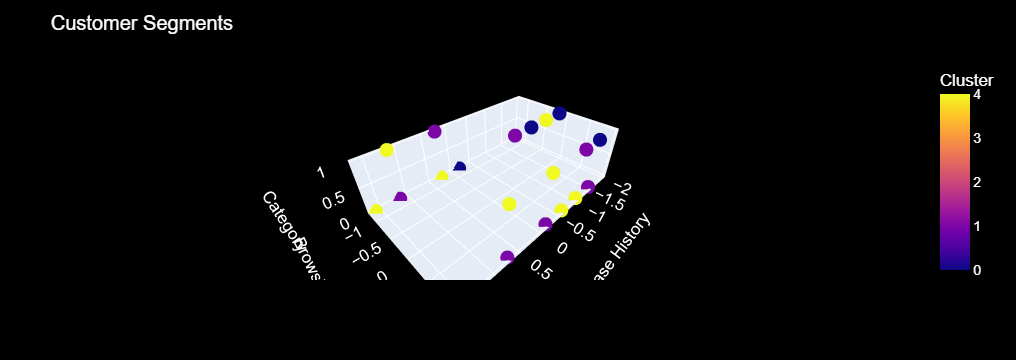

In [201]:
import plotly.express as px
import pandas as pd

# Assuming your data is in a Pandas DataFrame called `df`

# Create a new column for the cluster labels
df['Cluster'] = [0]*13 + [1]*37 + [2]*23 + [3]*15 + [4]*12

# Create a 3D scatter plot
fig = px.scatter_3d(df, x="Purchase History", y="Browsing Behavior", z="Category", color="Cluster")
fig.update_layout(
    title="Customer Segments",
    scene = dict(
        xaxis_title="Purchase History",
        yaxis_title="Browsing Behavior",
        zaxis_title="Category"),
    font=dict(
        family="Arial",
        size=14,
        color="#ffffff"
    ),
    plot_bgcolor="#f0f0f0", 
    paper_bgcolor="#000000",
    xaxis_showgrid=True,
    yaxis_showgrid=True,
    xaxis_gridcolor="#fff000", 
    yaxis_gridcolor="#000fff"
)

fig.show()

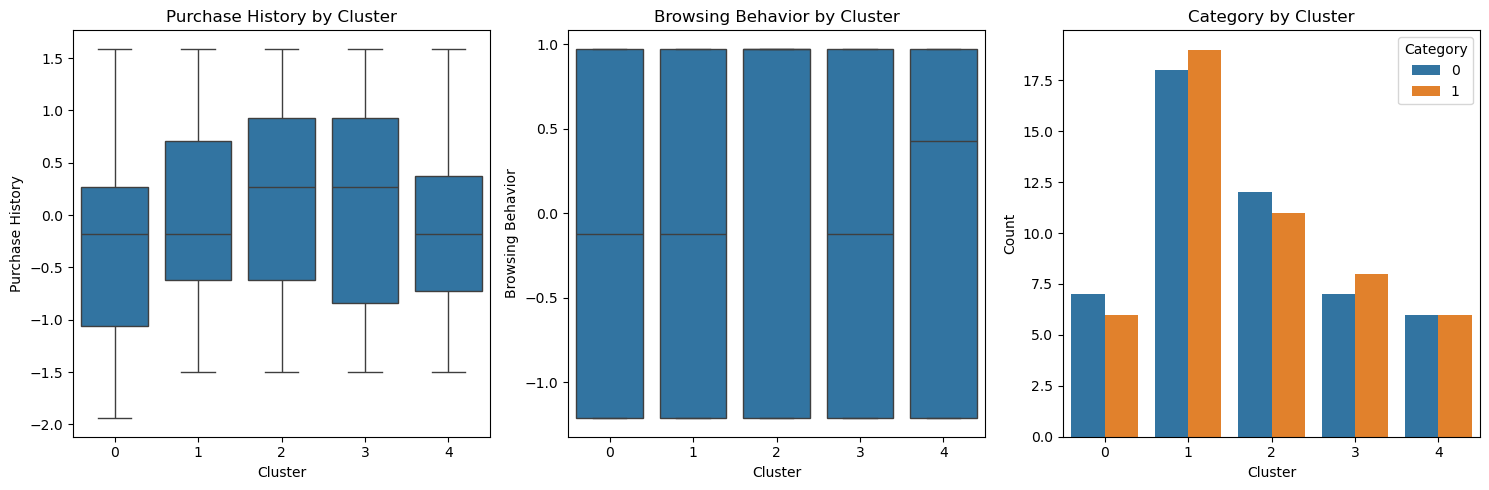

In [209]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def create_cluster_labels(df):
    """Create cluster labels for the customer data"""
    cluster_labels = []
    for i, row in df.iterrows():
        if i < 13:
            cluster_labels.append(0)
        elif i < 50:
            cluster_labels.append(1)
        elif i < 73:
            cluster_labels.append(2)
        elif i < 88:
            cluster_labels.append(3)
        else:
            cluster_labels.append(4)
    return cluster_labels

def create_plots(df, cluster_labels):
    """Create plots for the customer data"""
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    sns.boxplot(x=cluster_labels, y="Purchase History", data=df.assign(Cluster=cluster_labels), ax=axs[0])
    axs[0].set_title("Purchase History by Cluster")
    axs[0].set_xlabel("Cluster")
    axs[0].set_ylabel("Purchase History")

    sns.boxplot(x=cluster_labels, y="Browsing Behavior", data=df.assign(Cluster=cluster_labels), ax=axs[1])
    axs[1].set_title("Browsing Behavior by Cluster")
    axs[1].set_xlabel("Cluster")
    axs[1].set_ylabel("Browsing Behavior")

    sns.countplot(x=cluster_labels, hue="Category", data=df.assign(Cluster=cluster_labels), ax=axs[2])
    axs[2].set_title("Category by Cluster")
    axs[2].set_xlabel("Cluster")
    axs[2].set_ylabel("Count")

    plt.tight_layout()
    plt.show()

cluster_labels = create_cluster_labels(df)


create_plots(df, cluster_labels)

Here are some challenges that may be faced:

1. Imbalanced Data: The data is imbalanced, with 50 customers in the "Electronics" category and 50 customers in the "Fashion" category. This imbalance may affect the performance of machine learning models.
2. Limited Features: The data only has four features: Customer ID, Category, Purchase History, and Browsing Behavior. This limited feature set may not capture all the relevant information about the customers.
3. Categorical Variables: The Category and Browsing Behavior features are categorical variables, which may require special handling in machine learning models.
4. Outliers: The Purchase History feature has a wide range of values (from 100 to 900), which may indicate the presence of outliers. These outliers may affect the performance of machine learning models.
5. Lack of Context: The data does not provide any context about the customers, such as their demographics, location, or purchase history over time. This lack of context may make it difficult to understand the underlying patterns in the data.
6. Data Quality Issues: The data may contain errors or inconsistencies, such as missing values or incorrect categorization. These data quality issues may affect the accuracy of machine learning models.
7. Overfitting: The data has a relatively small sample size (100 customers), which may lead to overfitting in machine learning models. Overfitting occurs when a model is too complex and fits the noise in the training data rather than the underlying patterns.
8. Lack of Temporal Information: The data does not provide any temporal information, such as the date of purchase or the time of browsing. This lack of temporal information may make it difficult to understand the dynamics of customer behavior over time.

Some potential improvements to the code: 

Use a consistent naming convention: The code uses both camelCase and underscore notation for variable names. It's better to stick to a single convention throughout the code.
1. Use more descriptive variable names: Variable names like df and x are not very descriptive. Consider using more descriptive names like customer_data and purchase_history.
2. Add comments and docstrings: Comments and docstrings can help explain the purpose of the code and make it easier for others to understand.
3. Use functions: The code is a single block of code. Consider breaking it up into smaller functions, each with a specific responsibility. This can make the code more modular and easier to maintain.
4. Use a more robust way to create the cluster labels: The code uses a simple list comprehension to create the cluster labels. Consider using a more robust method, such as using a dictionary to map cluster numbers to labels.
5. Use a more efficient way to create the plots: The code creates three separate plots using matplotlib. Consider using a more efficient method, such as using seaborn to create a single plot with multiple subplots.
6. Add more customization options: The code uses default settings for the plots. Consider adding more customization options, such as allowing the user to specify the plot title, axis labels, and colors.
7. Use a more robust way to handle missing values: The code assumes that there are no missing values in the data. Consider using a more robust method, such as using pandas to handle missing values.